In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm

# Section B

A firm is trying to predict the temperature based on various environmental and seasonal settings. They want to utilize a rational approach facilitated by machine learning in predicting the temperature in Celsius. They collect a data set with different features along with the temperature. The challenge is to learn a relationship between the important features and the temperature and use it to predict the future temperature. 
Develop a machine learning model to predict the temperature using the features provided in the dataset. Prior to building the ML model EDA need to carried out to understand and clean the data.         


## i) 
    Read the dataset and perform the following 
     *Observe the data types of the features. (1 Marks)
     *Observe the features in the dataset that add little to no information (1 Marks)
     *Visualize the relationship between 'Wind Speed (km/h) and Temperature (C) (2 Marks)

In [358]:
df = pd.read_csv('weatherHistory4.csv')

In [359]:
df.dtypes

Formatted Date             object
Summary                    object
Precip Type                object
Temperature (C)           float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)      int64
Visibility (km)           float64
Loud Cover                  int64
Pressure (millibars)      float64
Daily Summary              object
dtype: object

In [360]:
df.select_dtypes(np.number).std()

Temperature (C)             9.494446
Humidity                    0.194187
Wind Speed (km/h)           6.910747
Wind Bearing (degrees)    107.398623
Visibility (km)             4.191105
Loud Cover                  0.000000
Pressure (millibars)      117.056270
dtype: float64

Loud Cover has standard deviation 0. It means, it does not add any information to the model. We can drop this feature.
Humidity adds very less information to the model

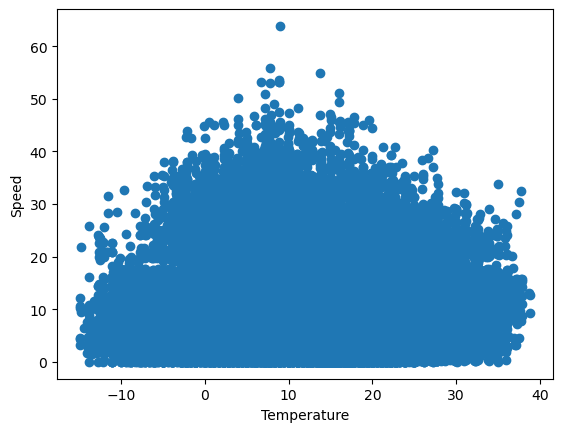

In [361]:
#plt.figure(figsize=(10,10))
plt.scatter(df['Temperature (C)'],df['Wind Speed (km/h)'])
plt.xlabel('Temperature')
plt.ylabel('Speed')
plt.show()

It seems these is not linear relationship between Speed of wind and Temperature.

## ii)
Perform the following analysis to understand the data 

●	Check for Missing values in the data and display the percentage of missing values in each column (2 Marks)

●	Implement a strategy to deal with the missing values. (2 Marks



In [362]:
pd.DataFrame([df.isna().sum(),df.isna().sum()*100/df.isna().count()],['Null Value','Percentage']).T

,Null Value,Percentage
Formatted Date,3028.0,3.146595
Summary,0.0,0.000000
Precip Type,517.0,0.537249
Temperature (C),0.0,0.000000
Humidity,0.0,0.000000
Wind Speed (km/h),0.0,0.000000
Wind Bearing (degrees),0.0,0.000000
Visibility (km),0.0,0.000000
Loud Cover,0.0,0.000000
Pressure (millibars),0.0,0.000000


There are 2 features where there is a presence of null values. Both of the features are categorical variables.
We can further investigate these 2 features.

In [363]:
df.describe(include=object)

,Formatted Date,Summary,Precip Type,Daily Summary
count,93203,96231,95714,96231
unique,93179,27,2,214
top,2010-08-02 02:00:00+00:00,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31656,85078,20083


Formatted Date has very large set of unique values and has only 3% missing values. We can simply drop null values using this feature
Precip Type has nearly .5% of missing values but has only 2 unique values. We can do mode imputation for the missing values in this feature

## iii)
Create a new column as year, month, day and hour using the date column (1+1+1+1 marks)

In [364]:
df.insert(1,'Year',pd.to_datetime(df['Formatted Date']).dt.year)
df.insert(2,'Month',pd.to_datetime(df['Formatted Date']).dt.month)
df.insert(3,'Day',pd.to_datetime(df['Formatted Date']).dt.day)
df.insert(4,'Hour',pd.to_datetime(df['Formatted Date']).dt.hour)
df.head()

,Formatted Date,Year,Month,Day,Hour,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,2006.0,3.0,31.0,22.0,Partly Cloudy,rain,9.472222,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,2006.0,3.0,31.0,23.0,Partly Cloudy,rain,9.355556,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,2006.0,4.0,1.0,0.0,Mostly Cloudy,rain,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,2006.0,4.0,1.0,1.0,Partly Cloudy,rain,8.288889,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,2006.0,4.0,1.0,2.0,Mostly Cloudy,rain,8.755556,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


## iv)
Perform the following:
*  Use boxplot to visualize the outliers of numeric columns. (3 Marks)
* Perform outlier elimination using IQR method. (3 Marks)


In [365]:
df_num = df.select_dtypes(include=np.number)

In [366]:
def draw_boxplot(df):
    plt.figure(figsize=(15,30))
    df_num = df.select_dtypes(include=np.number)
    shape = df.shape
    columns = shape[1]
    if columns % 2 != 0:
        columns += 1
    counter = 0
    for col in df_num.columns:
        counter += 1
        plt.subplot(int(columns/2),2,counter)
        sns.boxplot(x=df[col])
    plt.show()

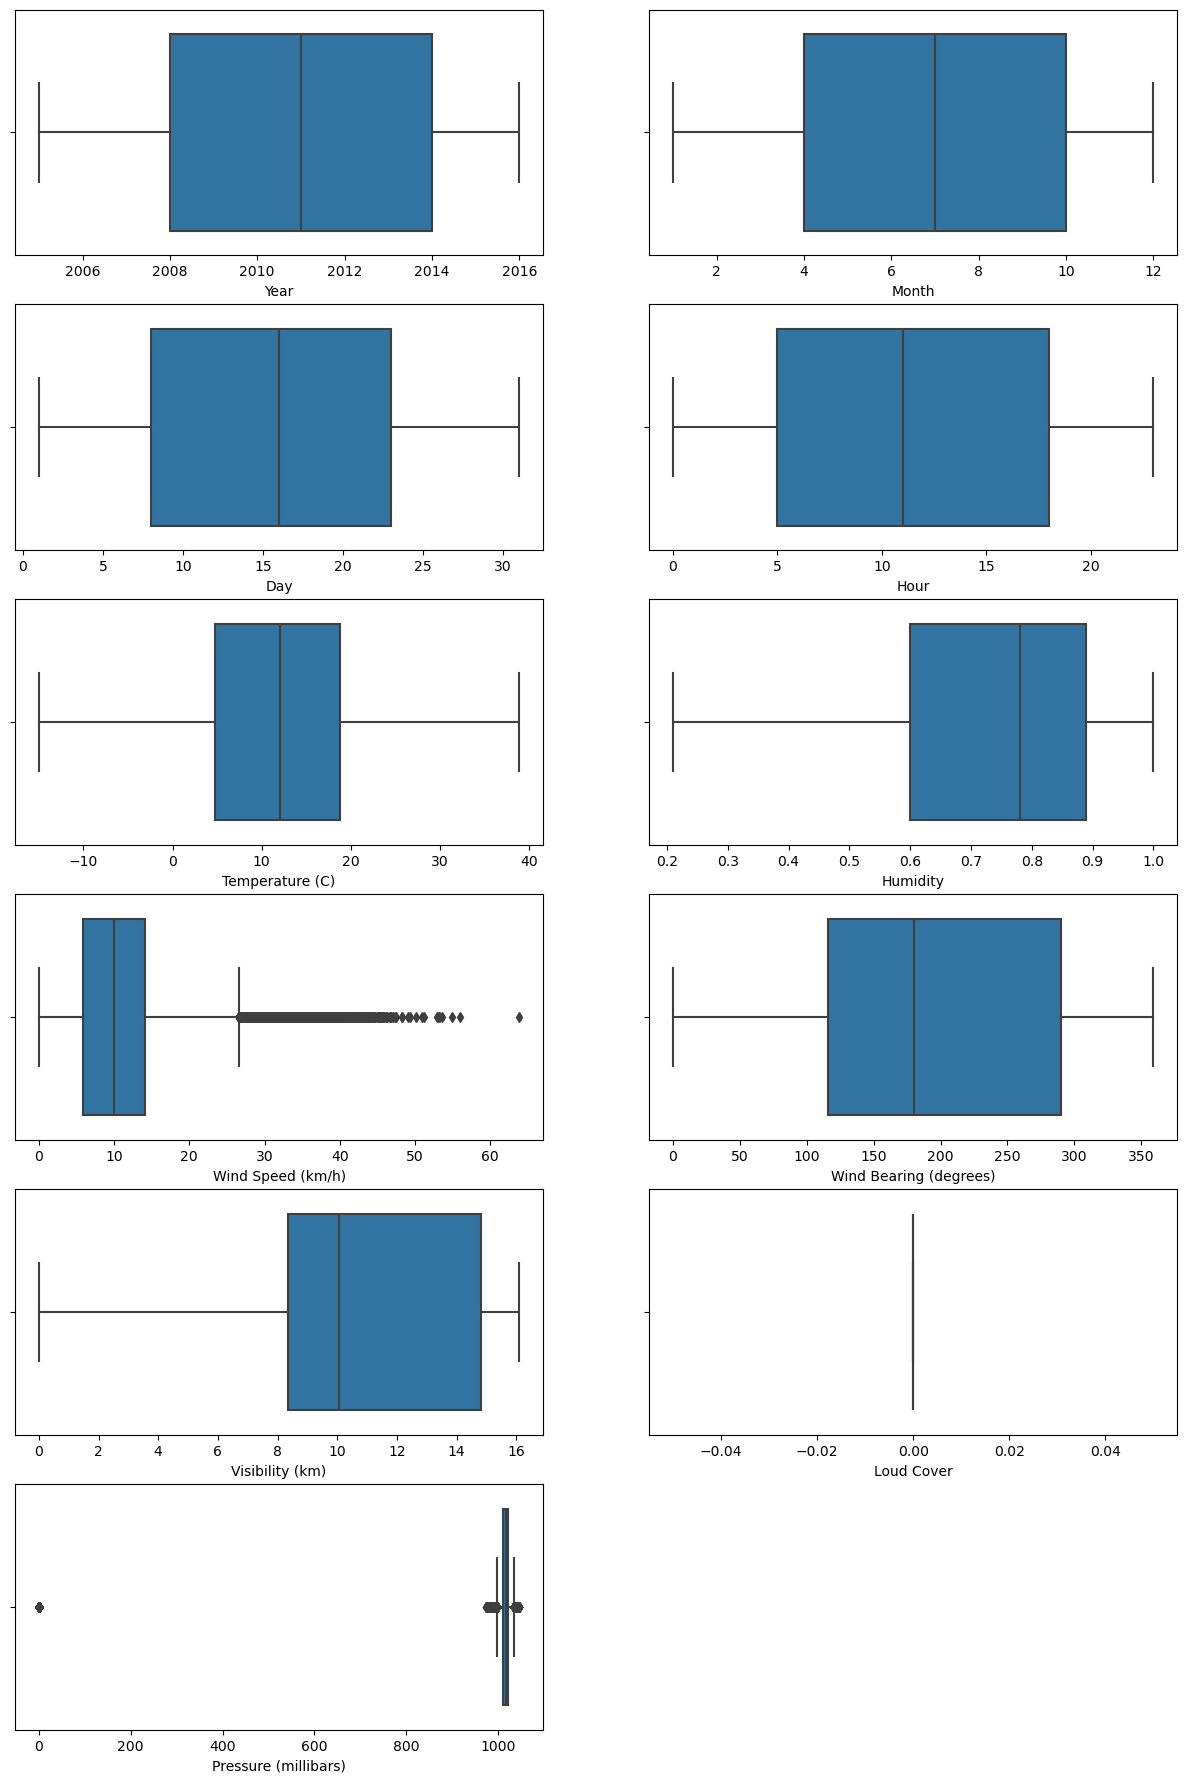

In [367]:
draw_boxplot(df)

It looks like Wind Speed and Pressure has some outliers. We can remove them

In [368]:
df.shape

(96231, 15)

In [369]:
Q1 = df['Wind Speed (km/h)'].quantile(.25)
Q3 = df['Wind Speed (km/h)'].quantile(.75)

IQR = Q3 - Q1

df = df[~((df['Wind Speed (km/h)'] < (Q1 - 1.5 * IQR))|(df['Wind Speed (km/h)'] > (Q3 + 1.5 * IQR)))]

In [370]:
df.shape

(93222, 15)

In [371]:
Q1 = df['Pressure (millibars)'].quantile(.25)
Q3 = df['Pressure (millibars)'].quantile(.75)

IQR = Q3 - Q1

df = df[~((df['Pressure (millibars)'] < (Q1 - 1.5 * IQR))|(df['Pressure (millibars)'] > (Q3 + 1.5 * IQR)))]

In [372]:
df.shape

(89058, 15)

## v)
Perform the following:
*Plot a correlation plot and highlight the correlations with color map(3 Marks)
* Compute multicollinearity for input features using VIF and drop the high VIF features sequentially. (3 Marks)


C:\Python\Anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

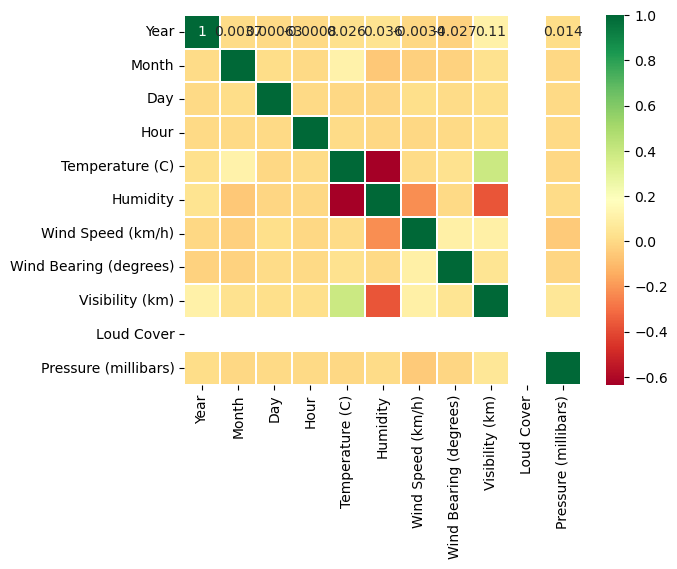

In [373]:
sns.heatmap(df_num.corr(), cmap ='RdYlGn', linewidths = 0.30, annot = True)

In [374]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [375]:
df_num.isna().sum()

Year                      3028
Month                     3028
Day                       3028
Hour                      3028
Temperature (C)              0
Humidity                     0
Wind Speed (km/h)            0
Wind Bearing (degrees)       0
Visibility (km)              0
Loud Cover                   0
Pressure (millibars)         0
dtype: int64

In [376]:
df.dropna(subset=['Year'],inplace=True)
df_num = df.select_dtypes(include=np.number)
df_num.isna().sum()

Year                      0
Month                     0
Day                       0
Hour                      0
Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Loud Cover                0
Pressure (millibars)      0
dtype: int64

In [377]:
checkVIF(df_num)

C:\Python\Anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
0,Year,28194.85
10,Pressure (millibars),27096.15
5,Humidity,31.67
8,Visibility (km),9.00
4,Temperature (C),5.96
1,Month,4.77
6,Wind Speed (km/h),4.73
2,Day,4.19
7,Wind Bearing (degrees),4.08
3,Hour,3.72


In [378]:
df.drop('Year',axis=1,inplace=True)
df_num.drop('Year',axis=1,inplace=True)

checkVIF(df_num)

C:\Python\Anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
9,Pressure (millibars),67.71
4,Humidity,27.84
7,Visibility (km),8.91
3,Temperature (C),4.90
0,Month,4.74
5,Wind Speed (km/h),4.35
1,Day,4.19
6,Wind Bearing (degrees),4.07
2,Hour,3.72
8,Loud Cover,NaN


In [379]:
df.drop('Pressure (millibars)',axis=1,inplace=True)
df_num.drop('Pressure (millibars)',axis=1,inplace=True)

checkVIF(df_num)

C:\Python\Anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
4,Humidity,8.50
7,Visibility (km),7.86
0,Month,4.51
6,Wind Bearing (degrees),4.01
1,Day,4.00
5,Wind Speed (km/h),3.73
3,Temperature (C),3.65
2,Hour,3.59
8,Loud Cover,NaN


In [380]:
df.drop('Humidity',axis=1,inplace=True)
df_num.drop('Humidity',axis=1,inplace=True)

checkVIF(df_num)

C:\Python\Anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
6,Visibility (km),7.24
0,Month,3.95
4,Wind Speed (km/h),3.68
1,Day,3.62
5,Wind Bearing (degrees),3.60
2,Hour,3.26
3,Temperature (C),3.19
7,Loud Cover,NaN


## vi)
Perform the following:
*Drop all irrelevant features though the EDA performed in above steps. (3 Marks)
*Use encoding technique to encode the categorical variables. (3 Marks)


In [381]:
df.describe(include='object')

,Formatted Date,Summary,Precip Type,Daily Summary
count,86075,86075,85954,86075
unique,86063,13,2,204
top,2010-08-02 03:00:00+00:00,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,29722,77018,18402


In [382]:
df['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [383]:
df.drop('Loud Cover',axis=1,inplace=True)
df.drop('Formatted Date',axis=1,inplace=True)
df.drop('Daily Summary',axis=1,inplace=True)

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86075 entries, 0 to 93202
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   86075 non-null  float64
 1   Day                     86075 non-null  float64
 2   Hour                    86075 non-null  float64
 3   Summary                 86075 non-null  object 
 4   Precip Type             85954 non-null  object 
 5   Temperature (C)         86075 non-null  float64
 6   Wind Speed (km/h)       86075 non-null  float64
 7   Wind Bearing (degrees)  86075 non-null  int64  
 8   Visibility (km)         86075 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 6.6+ MB


In [385]:
df_cat = df.select_dtypes(include='object')

In [413]:
df_cat.isna().sum()

Summary          0
Precip Type    121
dtype: int64

In [416]:
df['Precip Type'].fillna(df['Precip Type'].mode()[0], inplace=True)

In [417]:
df.isna().sum()

Month                     0
Day                       0
Hour                      0
Summary                   0
Precip Type               0
Temperature (C)           0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
dtype: int64

In [418]:
dummies = pd.get_dummies(df,  drop_first=True, dtype=np.int8)

In [419]:
dummies.dtypes

Month                              float64
Day                                float64
Hour                               float64
Temperature (C)                    float64
Wind Speed (km/h)                  float64
Wind Bearing (degrees)               int64
Visibility (km)                    float64
Summary_Drizzle                       int8
Summary_Dry                           int8
Summary_Dry and Mostly Cloudy         int8
Summary_Dry and Partly Cloudy         int8
Summary_Foggy                         int8
Summary_Humid and Mostly Cloudy       int8
Summary_Humid and Overcast            int8
Summary_Humid and Partly Cloudy       int8
Summary_Light Rain                    int8
Summary_Mostly Cloudy                 int8
Summary_Overcast                      int8
Summary_Partly Cloudy                 int8
Precip Type_snow                      int8
dtype: object

In [420]:
dummies.head()

,Month,Day,Hour,Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Summary_Drizzle,Summary_Dry,Summary_Dry and Mostly Cloudy,Summary_Dry and Partly Cloudy,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Overcast,Summary_Humid and Partly Cloudy,Summary_Light Rain,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Precip Type_snow
0,3.0,31.0,22.0,9.472222,14.1197,251,15.8263,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3.0,31.0,23.0,9.355556,14.2646,259,15.8263,0,0,0,0,0,0,0,0,0,0,0,1,0
2,4.0,1.0,0.0,9.377778,3.9284,204,14.9569,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4.0,1.0,1.0,8.288889,14.1036,269,15.8263,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4.0,1.0,2.0,8.755556,11.0446,259,15.8263,0,0,0,0,0,0,0,0,0,1,0,0,0


# Section C

## i)
Use OLS stats models’ package to build the Linear Regression model and generate the summary report. (3 + 3 Marks)

In [421]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dummies)

scaled_data

array([[-1.03869614,  1.74783105,  1.50906355, ..., -0.45469672,
         1.37695423, -0.34035691],
       [-1.03869614,  1.74783105,  1.6526648 , ..., -0.45469672,
         1.37695423, -0.34035691],
       [-0.7468628 , -1.67137898, -1.65016398, ..., -0.45469672,
        -0.72624055, -0.34035691],
       ...,
       [ 0.7123039 , -0.75958964,  1.07825979, ..., -0.45469672,
        -0.72624055, -0.34035691],
       [ 0.7123039 , -0.75958964,  1.22186105, ..., -0.45469672,
        -0.72624055, -0.34035691],
       [ 0.7123039 , -0.75958964,  1.3654623 , ..., -0.45469672,
        -0.72624055, -0.34035691]])

In [422]:
df_cleaned1 = dummies.copy()

In [423]:
from sklearn.model_selection import train_test_split

In [424]:
Y = df_cleaned1.pop('Temperature (C)')
X = df_cleaned1
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.3, random_state=100)
X1 = sm.add_constant(x_train)
model = sm.OLS(y_train,X1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     2327.
Date:                Fri, 02 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:45:32   Log-Likelihood:            -2.0518e+05
No. Observations:               60252   AIC:                         4.104e+05
Df Residuals:                   60233   BIC:                         4.106e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## ii)
Build a model using least squares regression. Interpret the coefficients. (3 + 3= 6 Marks)

In [425]:
from sklearn.linear_model import LinearRegression

In [426]:
sk_lr = LinearRegression()
sk_lr = sk_lr.fit(x_train, y_train)

In [427]:
print(sk_lr.score(x_train, y_train))

0.41021633497462173


In [428]:
sk_lr.coef_

array([ 1.06289146e-01,  6.88636553e-04, -9.72758433e-03, -1.92318174e-02,
       -1.96558366e-04,  3.08370871e-01, -3.06421555e-14,  1.52910186e+01,
        1.18285169e+01,  1.31836967e+01, -3.54335641e+00,  7.37693329e+00,
        7.27477579e+00,  8.08690124e+00, -4.66844885e+00, -1.15180585e-02,
       -3.36512505e+00,  2.94053221e+00, -1.39636525e+01])

In [429]:
y_pred = sk_lr.predict(x_test)

In [430]:
from sklearn.metrics import mean_squared_error

In [431]:
mean_squared_error(y_test,y_pred)

53.238831762624784

In [432]:
np.sqrt(mean_squared_error(y_test,y_pred))

7.296494484519589

In [433]:
np.sqrt(mean_squared_error(y_test,y_pred)) / y_test.std()

0.7655695551784084

## iii)
Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables. (3 + 3= 6 Marks)

In [434]:
print(sk_lr.score(x_train, y_train))

0.41021633497462173


## iv) 
Validate models performance using 5 fold cross validation and print the different RMSE scores. Comment about model’s overfitting. (2+2+2=6 Marks)

## v)
Use Grid Search CV to determine the optimal value of alpha if Ridge regression is used to build the model. (4 +2=6 Marks)